In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

In [2]:
glass = np.genfromtxt("glas_data_preprocessing/glas-preprocessed.csv", skip_header=True, delimiter=',')
print(glass.shape)

dataset_1 = np.genfromtxt("data_data_preprocessing/data-preprocessed.csv", skip_header=True, delimiter=',')
print(dataset_1.shape)

(214, 10)
(360, 5)


### t-SNE

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


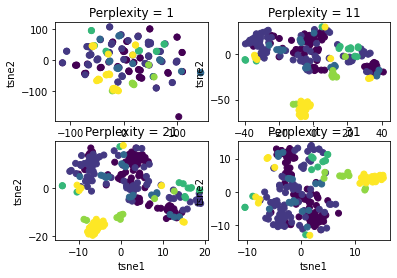

In [3]:
import matplotlib as mpl

mpl.rcParams['figure.dpi'] = 200

for i in range(4):
    plt.subplot(2, 2, i + 1)

    tsne = TSNE(n_components=2, perplexity=1 + 10 * i, n_iter=2000, random_state=10, learning_rate='auto', init='pca')

    tsne_components = tsne.fit_transform(glass[:, :-1])
    plt.scatter(tsne_components[:, 0], tsne_components[:, 1], c=glass[:, -1])
    plt.title(f"Perplexity = {1 + 10 * i}")
    plt.xlabel('tsne1')
    plt.ylabel('tsne2')
plt.show()


#### By trying different perplexity values, we can see that good performing ones are close to 11 and 21. There, most of yellow points are grouped together, as well as most of both "green" points. Purple ones are still pretty mixed, however, but look more separable than when using perplexity of 31 or 1. We also tried different. When using 'pca' initialization, results are usually better than when it is set to 'random', so we use it

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


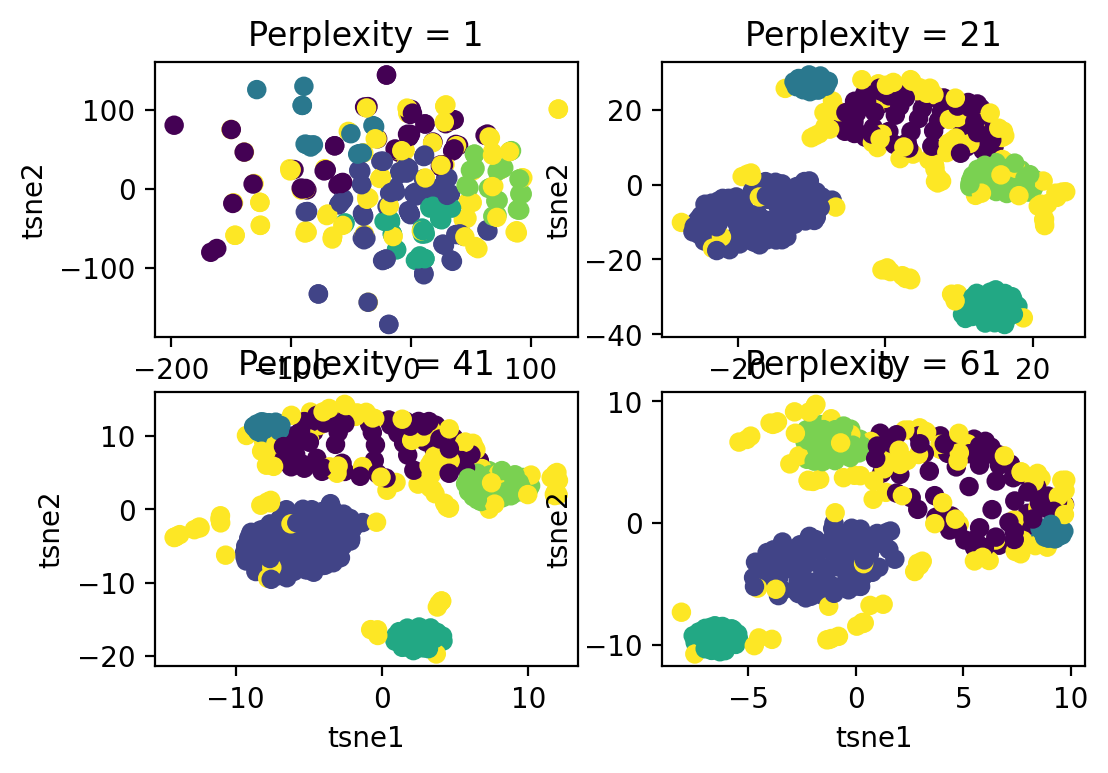

In [4]:
import matplotlib as mpl

mpl.rcParams['figure.dpi'] = 200

for i in range(4):
    plt.subplot(2, 2, i + 1)

    tsne = TSNE(n_components=2, perplexity=1 + 20 * i, n_iter=2000, random_state=10, learning_rate='auto', init='pca')

    tsne_components = tsne.fit_transform(dataset_1[:, :-1])
    plt.scatter(tsne_components[:, 0], tsne_components[:, 1], c=dataset_1[:, -1])
    plt.title(f"Perplexity = {1 + 20 * i}")
    plt.xlabel('tsne1')
    plt.ylabel('tsne2')
plt.show()


#### On this dataset, we can see that having larger perplexity benefits data separation, but having it too large, like 61 in this case leads to some glasses get more mixed together. In general, we can see that 5 classes are separable very well, and if there was no "yellow" class present, the separation would be almost ideal. The "yellow" one is "mixes" into all of the classes making it difficult to identify

## AHC

In [35]:
# Function taken from sklearn website (https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html)
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    return dendrogram(linkage_matrix, **kwargs)['leaves']

#### Firstly, for the provided dataset

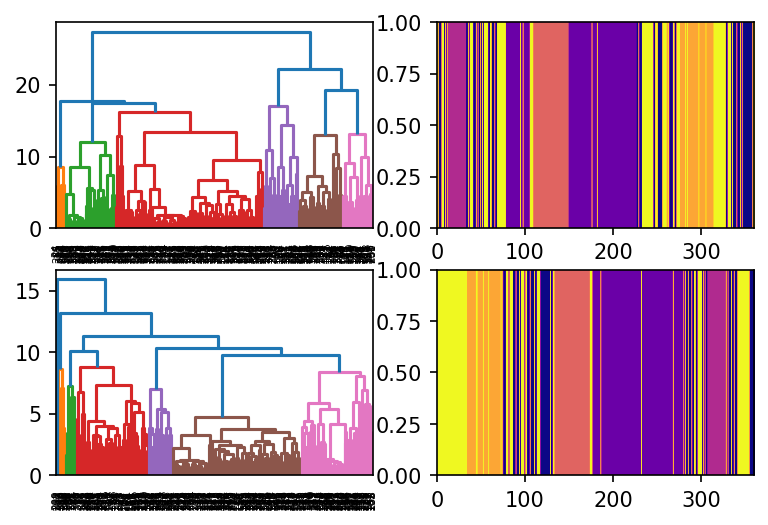

In [57]:
mpl.rcParams['figure.dpi'] = 150

linkages = ('complete', 'average')
# Just selecting thresholds in a way that we get exactly 6 distinct classes in the output
thresholds = (17, 9)

for i in range(2):
    plt.subplot(2, 2, i * 2 + 1)
    model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage=linkages[i])
    model = model.fit(dataset_1[:, :-1])
    leaves = plot_dendrogram(model, color_threshold=thresholds[i], distance_sort=True)

    plt.subplot(2, 2, i * 2 + 2)

    x = np.arange(0, dataset_1.shape[0])
    y = dataset_1[leaves, -1]
    extent = [x[0] - (x[1] - x[0]) / 2., x[-1] + (x[1] - x[0]) / 2., 0, 1]
    plt.imshow(y[np.newaxis, :], cmap="plasma", aspect="auto", extent=extent)


From the plot above, we can see (on the left) how data is classified into 6 classes and (on the left) actual labels of those classified leaves. The colors here don't match, but we can still see that the model does not perform well on this dataset. Let's do the same for glass dataset

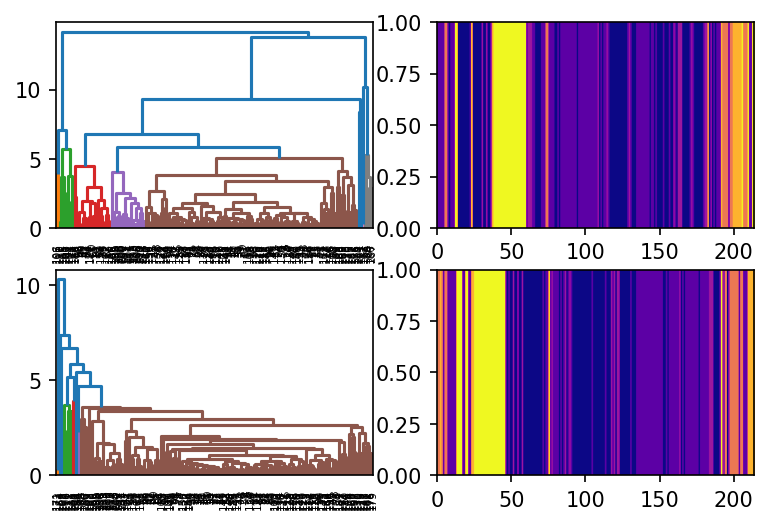

In [62]:
mpl.rcParams['figure.dpi'] = 150

linkages = ('complete', 'average')
# Just selecting thresholds in a way that we get exactly 7 distinct classes in the output
thresholds = (5.8, 4)

for i in range(2):
    plt.subplot(2, 2, i * 2 + 1)
    model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage=linkages[i])
    model = model.fit(glass[:, :-1])
    leaves = plot_dendrogram(model, color_threshold=thresholds[i], distance_sort=True)

    plt.subplot(2, 2, i * 2 + 2)

    x = np.arange(0, glass.shape[0])
    y = glass[leaves, -1]
    extent = [x[0] - (x[1] - x[0]) / 2., x[-1] + (x[1] - x[0]) / 2., 0, 1]
    plt.imshow(y[np.newaxis, :], cmap="plasma", aspect="auto", extent=extent)


Here, we can see that the "average" linkage performs very poorly by grouping most of samples into one large cluster and creating a few small clusters with only a few samples in each